In [1]:
import pandas as pd

import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)


import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
print(type(iris.data))
iris.data.shape

<class 'numpy.ndarray'>


(150, 4)

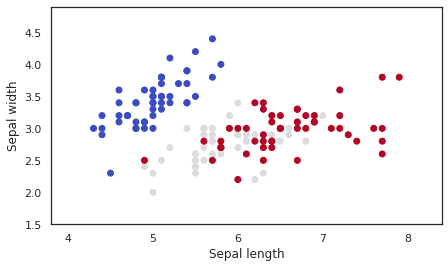

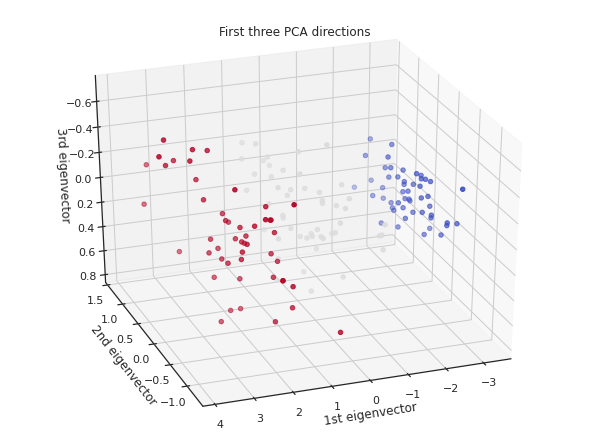

In [4]:
X = iris.data[:, :2]  # taking the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


plt.figure(2, figsize=(7, 4))

plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.coolwarm)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
# ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("2nd eigenvector")
# ax.w_yaxis.set_ticklabels([])


ax.set_zlabel("3rd eigenvector")
# ax.w_zaxis.set_ticklabels([])

plt.show()

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target

print (iris.target_names)
df['species'] = df['target'].map({0:iris.target_names[0],1:iris.target_names[1],2:iris.target_names[2]})
df.head()

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


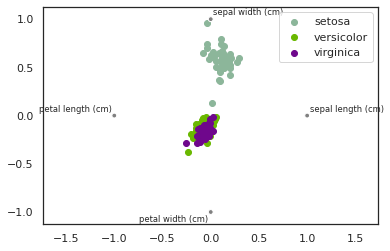

In [8]:
from pandas.plotting import radviz
radviz(df.drop("target", axis=1), "species")